<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Classification and Metrics
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> Machine Learning 2021</b> <br>
    <b>Lab05.01 - 19/05/2021<br>
    Marco Cannici <br>
    <a href="mailto:marco.cannici@polimi.it">marco.cannici@polimi.it</a><br>
    </div>
    </td>
    <td width="100px"> 
        <a href=http://chrome.ws.dei.polimi.it/index.php?title=Machine_Learning_Bio>
        <img align="right", width="100px" src='https://chart.googleapis.com/chart?cht=qr&chl=chrome.ws.dei.polimi.it/index.php?title=Machine_Learning_Bio&chs=180x180&choe=UTF-8&chld=L|0' alt=''>
        </a>
    </td>
</tr>
</table>

### An example - the Iris dataset

The Iris flower collection is a multivariate data set containing samples from three flower species : Iris setosa, Iris virginica and Iris versicolor.

Each sample contains measurements of 4 different features: the length and the width of the sepals and petals, in centimeters.

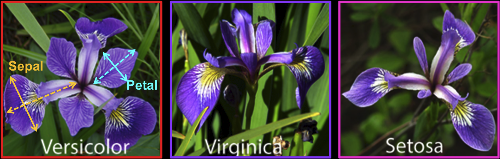

The Seaborn packages, as most of the Python machine learning tools, already comes with the Iris dataset. We can use the ``sns.load_dataset`` function to retrieve it.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# The iris dataset is already 
# available in the seaborn library
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


A first simple data exploration techniques to inspect features of a dataset is to take a look at their correlation. The ``corr()`` Seaborn function does that!

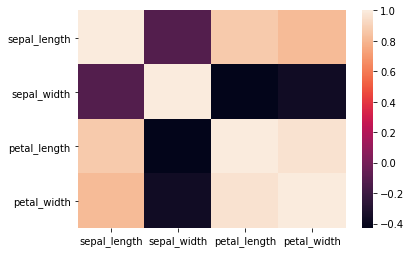

In [3]:
corr = iris.corr()
sns.heatmap(corr)

Looking at the correlation matrix, we can see that ``petal_width`` and ``petal_length`` seem to be highly correlated. We can take a futher look into this by plotting a ``pairplot`` of the dataset features. This function will plot a grid showing the univariate distributions of each feature (on the diagonal) and the dataset samples in 2D diagrams (for each possible pair of features).

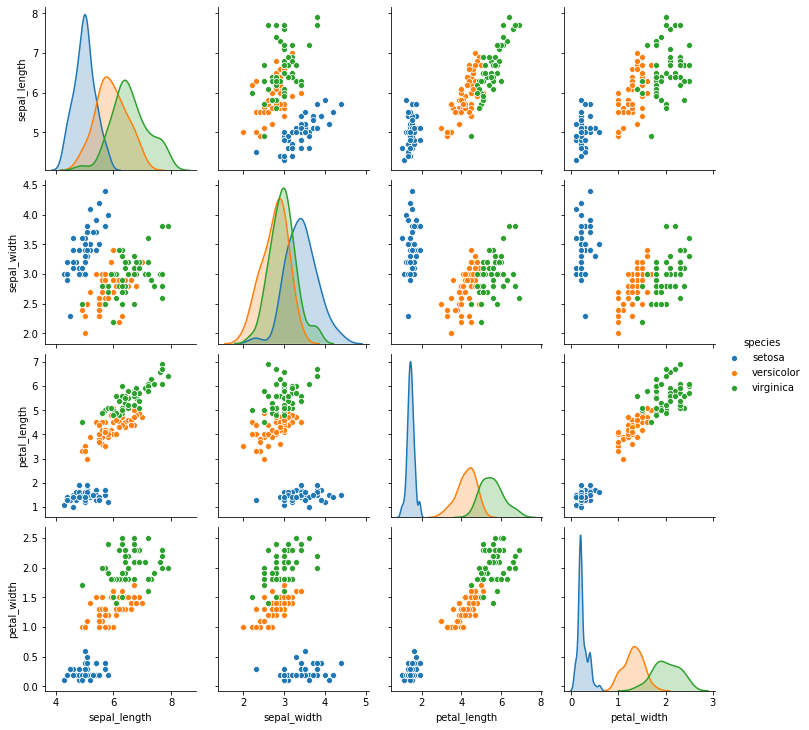

In [4]:
sns.pairplot(iris, hue='species', height=2.5)

## Support Vector Machine - Recap

The SVM algorithm finds a robust solution to the linearly separable problem. That is, there exists a hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0}\right)} = \mathbf{w}^{T} \cdot \mathbf{x}+w_{0}=0$, that separates two categories:

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$

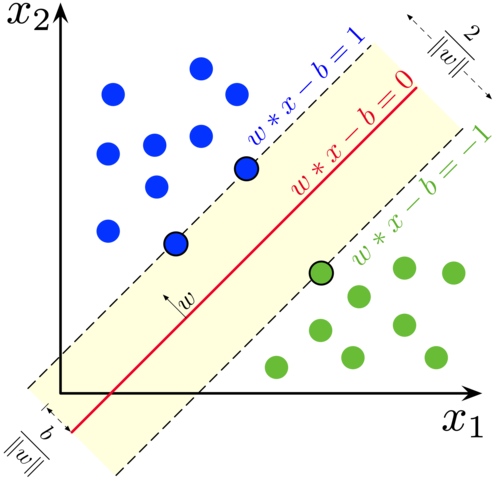

Every training point is either above the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} - 1\right)}$ or below the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} + 1\right)}$ . We call them *marginal hyperplanes*. Of course there are infinitely many hyperplanes for which the condition is satisfied, but the **hyperplane with the largest margin** is the one that appears in the Support Vector Machine model. **Margin** is the distance between marginal hyperplanes $M=1 /\|\mathbf{w}\|$.

### Linearly Separable case (hard margins)

Is the solution to the optimization problem:

$\min _{\mathbf{w}, w_{0}}\left\{\frac{1}{2}\|\mathbf{w}\|^{2}\right\}$

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$


We start with a linearly separable case, i.e., **classifying just two classes (setosa vs rest)** using the sepal characteristics. **We expect the SVM classifier to learn a robust boundary line, wrt the training data.**

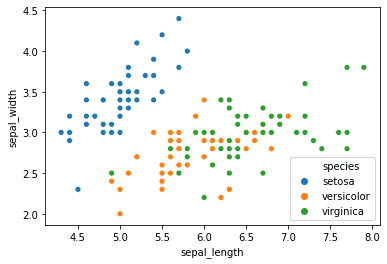

In [5]:
sns.scatterplot('sepal_length', 'sepal_width', data=iris, hue='species')

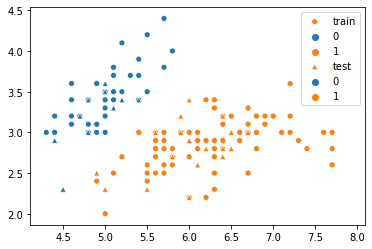

In [38]:
from sklearn.model_selection import train_test_split

# Select 
X = iris[['sepal_length', 'sepal_width']].to_numpy()
y = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 1}).to_numpy()

split_seed = 2020
split_test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

sns.scatterplot(X_train[:,0], X_train[:,1], hue=y_train, marker='o', label="train")
sns.scatterplot(X_test[:,0], X_test[:,1], hue=y_test, marker='^', label="test")

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# We set a very high C value, i.e., virtually
# disabling regularization
model = SVC(kernel='linear', C=np.inf)
model.fit(X_train, y_train)

train_acc = accuracy_score(model.predict(X_train), y_train)
test_acc = accuracy_score(model.predict(X_test), y_test)

print("SVM train accuracy:", train_acc)
print("SVM test accuracy:", test_acc)

SVM train accuracy: 1.0
SVM test accuracy: 1.0


### Visualize the SVM boundary

We know that the SVM solution is defined based on some **support vectors**, that is, _the set of training points such that the hyperplane $\mathbf{w}^{T} \cdot \mathbf{x}+w_{0}$ is either $+1$ or $-1$_. We can inspect the points in the support vector by using the SVM attribute `model.support_vectors_`.

In SVM **we don't predict a probability**, but just an unormalized score. We therefore don't have a `predict_proba` function but a `decision_function` that computes the scores.

Let's verify the value of `decision_function` (the SVM scores) in correspondence of the support vectors

Note: if you really want, you can actually retrieve probability values instead of scores by setting `SVC(probability=True)`, which enables the `predict_proba` function. What this argument does is to train an additional **logistic regressor** to convert SVM scores into probabilities (with a cross validation procedure). Obviously this makes the algorithm slower on large datasets. 

In [40]:
model.support_vectors_
model.decision_function(model.support_vectors_)

array([-0.9999312 , -1.00017576,  1.00009933])

We obtain values that are very close to $+1$ and $-1$, with some error due to the fact that we cannot actually set the "smoothness" to $0$ in scikit-learn, therefore still allowing the slack variables to be non-zero.

In [41]:
def plot_svm_line(model, Xrange, Yrange, label=None):
    Xmin, Xmax = Xrange
    Ymin, Ymax = Yrange
    # Create grid to evaluate model
    xx = np.linspace(Xmin, Xmax, 100)
    yy = np.linspace(Ymin, Ymax, 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.reshape(-1), YY.reshape(-1)]).T
    Z =  model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    c = plt.contour(XX, YY, Z, colors='g', 
                # We want to plot lines where the decision function is either -1, 0, or 1
                levels=[-1, 0, 1],
                # We set different line styles for each "decision line"
                linestyles=['--', '-', '--'])
    c.collections[1].set_label(label)
    # Remove this to add +1/-1/0 labels
    # plt.clabel(c, inline=1, fontsize=10)
    # plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, linewidth=1, facecolors='none', edgecolors='k')

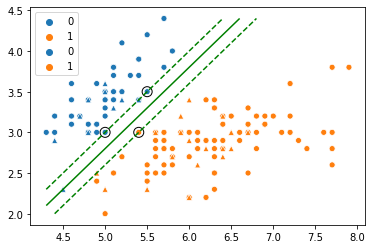

In [42]:
X0_range = (X_train[:,0].min(), X_train[:,0].max())
X1_range = (X_train[:,1].min(), X_train[:,1].max())

sns.scatterplot(X_train[:,0], X_train[:,1], hue=y_train, marker='o')
sns.scatterplot(X_test[:,0], X_test[:,1], hue=y_test, marker='^')
plot_svm_line(model, X0_range, X1_range)

### Non linearly separable case (soft margins)

We introduce slack variables to handle missclassified samples during optimization:

$\quad \min _{\mathbf{w}, w_{0}, \xi}\left\{\frac{1}{2}\|\mathbf{w}\|^{2}+C \sum_{i=1}^{N} \xi_{i}\right\}$

$\quad\begin{array}{l}{y_{i}\left(\mathbf{w}^{T} \cdot \mathbf{x}+w_{0}\right) \geqslant 1-\xi_{i}} \\ {\xi_{i} \geqslant 0}\end{array}$

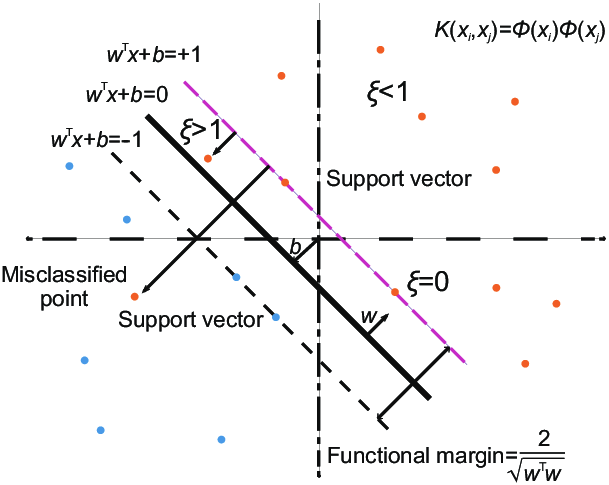

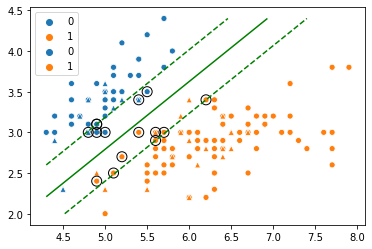

In [43]:
# Let's set the C parameter to smaller values
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

sns.scatterplot(X_train[:,0], X_train[:,1], hue=y_train, marker='o')
sns.scatterplot(X_test[:,0], X_test[:,1], hue=y_test, marker='^')
plot_svm_line(model, X0_range, X1_range)

By doing so, we enable points to be inside the margin. **The smaller the C, the larger the margin and the larger the number of support vectors.** Notice that slack variables are required for the optimization problem to have a solution if the problem is not linearly separable.

Note that even if the margin is larger, it is actually still defined to have a fixed length of $\quad2 = \frac{2}{||\mathbf{w}||}$ wrt the values produced with the model, i.e., the decision function. All the points whose predicted value smaller than $1$ or larger than $-1$ are support vectors by definition. 

In [44]:
model.decision_function(model.support_vectors_)

array([-1.00062503, -0.74518548, -0.95805219, -0.53232131, -0.74518675,
       -0.70261265, -1.00062503,  0.95773678,  0.7874429 ,  0.6597244 ,
        1.00031088,  0.31914045,  1.00030961,  0.74487134,  0.95773551])

In [46]:
model.dual_coef_ 

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -0.97224864,  1.        ,  1.        ,  1.        ,
         0.08013394,  1.        ,  0.89211469,  1.        ,  1.        ]])

## Logistic Regressor and Perceptron vs SVM classifier - Robustness

We know that SVM is trained to find a robust solution, that is the decision line that is most far away from the training points as possible. Let's compare this algorithm with other linear algorithms that hence also output a linear bound: **Logistic Regression** and the **Perceptron**

In [13]:
from sklearn.linear_model import LogisticRegression, Perceptron

# Train the SVM
svm_model = SVC(kernel='linear', C=np.inf)
svm_model.fit(X_train, y_train)

# Train a LogisticRegressor
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Train a Perceptron classifier (try verbose=True)
pt_model = Perceptron()
pt_model.fit(X_train, y_train)

for m in [svm_model, lr_model, pt_model]:
    train_acc = accuracy_score(y_train, m.predict(X_train))
    test_acc = accuracy_score(y_test, m.predict(X_test))
    print("{} train score: {}".format(m.__class__.__name__, train_acc))
    print("{} test score: {}".format(m.__class__.__name__, test_acc))

SVC train score: 1.0
SVC test score: 1.0
LogisticRegression train score: 1.0
LogisticRegression test score: 1.0
Perceptron train score: 1.0
Perceptron test score: 0.9666666666666667


In [14]:
# Shows the learned linear models
# intercept_ + coef_[0]*x + coef_[1]*y = 0
def plot_linear_line(model, Xrange, label=None):
    Xmin, Xmax = Xrange
    w0, = model.intercept_
    w1, w2 = model.coef_.flatten()

    x1, y1 = Xmin, -(w0 + w1 * Xmin) / w2
    x2, y2 = Xmax, -(w0 + w1 * Xmax) / w2
    sns.lineplot([x1, x2], [y1, y2], label=label)

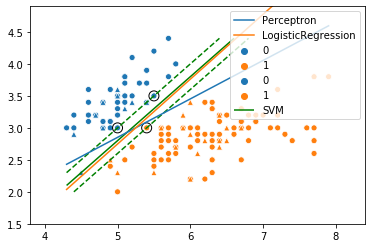

In [15]:
f = sns.scatterplot(X_train[:,0], X_train[:,1], hue=y_train, marker='o')
f = sns.scatterplot(X_test[:,0], X_test[:,1], hue=y_test, marker='^')

plot_svm_line(svm_model, X0_range, X1_range, label="SVM")
plot_linear_line(pt_model, X0_range, label="Perceptron")
plot_linear_line(lr_model, X0_range, label="LogisticRegression")
_ = plt.axis([X0_range[0]-0.5, X0_range[1]+0.5, X1_range[0]-0.5, X1_range[1]+0.5])

As expected:
- The SVM boundary is the one ost far away from the two different classes
- Logistc Regression maximizes the likelihood of points, therefore having a similar effect to the SVM
- The Perceptron is the "less rebust" omong the three methods. The training algorithms is indeed iterative, and it stops as soon as all the training values are correctly classified. In the last iteration (depending on the learning rate) it may move the line just enough to correctly classify the last remaining missclassified sample, resulting in a line very close to some trining data

### Not Linearly Separable Problem

Let's see how the algorithms behave when the probles is not linearly separable. Let's again start with a simple two class problem so that we can easily plot the decision boundaries: **virginica vs. versicolor**.

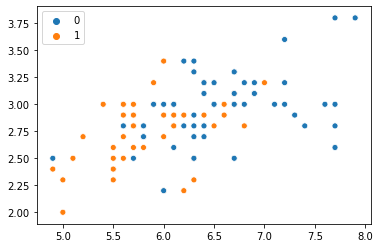

In [16]:
# Select 
X_ns = iris[['sepal_length', 'sepal_width']].to_numpy()
y_ns = iris['species'].replace({'virginica': 0, 'versicolor': 1, 'setosa': 2}).to_numpy()

# Remove setosa
ok_mask = y_ns != 2
X_ns = X_ns[ok_mask]
y_ns = y_ns[ok_mask]

X_ns_train, X_ns_test, y_ns_train, y_ns_test = train_test_split(X_ns, y_ns,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

sns.scatterplot(X_ns[:, 0], X_ns[:, 1], hue=y_ns)

SVC train score: 0.7
SVC test score: 0.85
LogisticRegression train score: 0.7125
LogisticRegression test score: 0.85
Perceptron train score: 0.55
Perceptron test score: 0.55


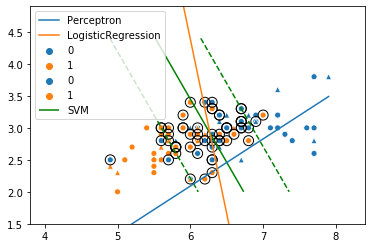

In [17]:
# Train a LogisticRegressor
lr_model = LogisticRegression(solver="lbfgs")
lr_model.fit(X_ns_train, y_ns_train)

# Train a Perceptron classifier (try verbose=True and n_iter_no_change=100)
pt_model = Perceptron()
pt_model.fit(X_ns_train, y_ns_train)

# Train an SVM classifier
svm_model = SVC(kernel='linear', C=1e3)
svm_model.fit(X_ns_train, y_ns_train)

sns.scatterplot(X_ns_train[:,0], X_ns_train[:,1], hue=y_ns_train, marker='o')
sns.scatterplot(X_ns_test[:,0], X_ns_test[:,1], hue=y_ns_test, marker='^')

plot_svm_line(svm_model, X0_range, X1_range, label="SVM")
plot_linear_line(pt_model, X0_range, label="Perceptron")
plot_linear_line(lr_model, X0_range, label="LogisticRegression")
_ = plt.axis([X0_range[0]-0.5, X0_range[1]+0.5, X1_range[0]-0.5, X1_range[1]+0.5])


for m in [svm_model, lr_model, pt_model]:
    train_acc = accuracy_score(y_ns_train, m.predict(X_ns_train))
    test_acc = accuracy_score(y_ns_test, m.predict(X_ns_test))
    print("{} train score: {}".format(m.__class__.__name__, train_acc))
    print("{} test score: {}".format(m.__class__.__name__, test_acc))

Both the **Logistic Regresson** and the **SVM** find a good solution, which of course does not correctly classify all training data.

However, the **Perceptron** seems not even close to a good solution. We know indeed that the Perceptron algorithm does not converge (i.e., it goes into an infinite loop) if the problem is not linearly separable. If we increase the `n_iter_no_change` parameter, we can see that the algorithm has not converged yet but stopped just because it detected that no improvement was found!

## Kernel Trick with SVM

The idea behind the Kernel Trick is similar to the one we used to obtain a **Polynomial Regressor**. We may want to enlarge our feature space in order to accommodate a non-linear boundary between the classes.

RBF (Radial Basis Function) Kernel:  $K\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\exp \left(-\gamma\left\|\boldsymbol{x}-\boldsymbol{x}^{\prime}\right\|^{2}\right)\quad$ where $\gamma$ is specified by parameter `gamma`, must be greater than 0

Polynomial Kernel: $K\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\left(\gamma\left\langle x, x^{\prime}\right\rangle+r\right)^{d}\quad$ where $d$ is specified by parameter `degree`, $r$ by `coef0`

Sigmoid Kernel: $K\left(\mathbf{x}, \mathbf{x}^{\prime}\right) = \tanh \left(\gamma\left\langle x, x^{\prime}\right\rangle+r\right)\quad$ where $r$ is specified by `coef0`, $\gamma$ is specified by parameter `gamma`

Train score: 0.675
Test score: 0.65


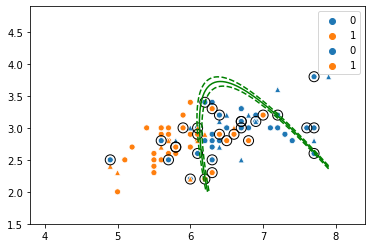

In [18]:
# Train an SVM classifier
svm_model = SVC(kernel='poly', degree=3, coef0=-5, C=5)
svm_model.fit(X_ns_train, y_ns_train)

sns.scatterplot(X_ns_train[:,0], X_ns_train[:,1], hue=y_ns_train, marker='o')
sns.scatterplot(X_ns_test[:,0], X_ns_test[:,1], hue=y_ns_test, marker='^')
plot_svm_line(svm_model, X0_range, X1_range, label="SVM")
_ = plt.axis([X0_range[0]-0.5, X0_range[1]+0.5, X1_range[0]-0.5, X1_range[1]+0.5])

train_acc = accuracy_score(y_ns_train, svm_model.predict(X_ns_train))
test_acc = accuracy_score(y_ns_test, svm_model.predict(X_ns_test))
print("Train score: {}".format(train_acc))
print("Test score: {}".format(test_acc))

As in Polynomial Regression, the boundary is still linear in the new feature space. However, if projected back into the input feature space we obtain a non linear bound!

### Grid Search for the best Kernel

In [19]:
from sklearn.model_selection import GridSearchCV

# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
svm_poly.fit(X_ns_train, y_ns_train)

# RBF
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}
rbf_poly = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_poly.fit(X_ns_train, y_ns_train)

# Sigmoid
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid'), param_grid, 
                         cv=5, scoring='accuracy', refit=True)
sigm_poly.fit(X_ns_train, y_ns_train)

GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

SVC(C=0.001, coef0=5.0, degree=4, kernel='poly')
cv score: 0.7
train score: 0.6875
test score: 0.8

SVC(C=100.0, gamma=0.001)
cv score: 0.7
train score: 0.675
test score: 0.8

SVC(C=50.000499999999995, gamma=0.001, kernel='sigmoid')
cv score: 0.675
train score: 0.625
test score: 0.75



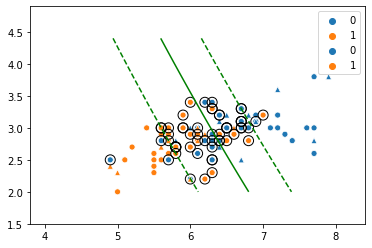

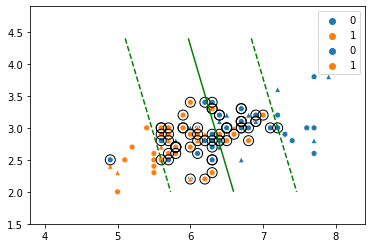

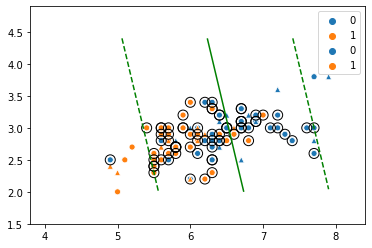

In [20]:
for m in [svm_poly, rbf_poly, sigm_poly]:
    cv_score = m.best_score_
    m = m.best_estimator_
    plt.figure()
    print(m)
    sns.scatterplot(X_ns_train[:,0], X_ns_train[:,1], hue=y_ns_train, marker='o')
    sns.scatterplot(X_ns_test[:,0], X_ns_test[:,1], hue=y_ns_test, marker='^')
    plot_svm_line(m, X0_range, X1_range)
    _ = plt.axis([X0_range[0]-0.5, X0_range[1]+0.5, X1_range[0]-0.5, X1_range[1]+0.5])
    train_acc = accuracy_score(y_ns_train, m.predict(X_ns_train))
    test_acc = accuracy_score(y_ns_test, m.predict(X_ns_test))
    print("cv score: {}".format(cv_score))
    print("train score: {}".format(train_acc))
    print("test score: {}\n".format(test_acc))

# Classification Metrics

### Confusion matrix
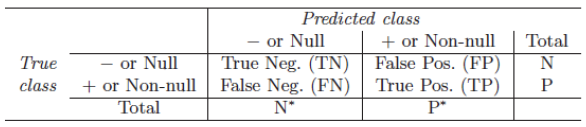

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_ns_test, svm_poly.predict(X_ns_test))
cm.shape

(2, 2)

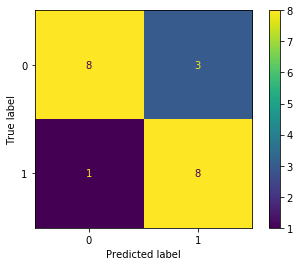

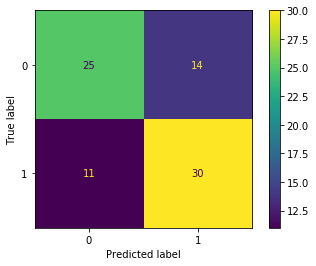

In [22]:
plot_confusion_matrix(svm_poly, X_ns_test, y_ns_test)
plot_confusion_matrix(svm_poly, X_ns_train, y_ns_train)

## Confusion Matrix related metrics

<table width="80%">
<tr>
<td>
    
**sensitivity, recall, hit rate, or true positive rate (TPR)**

$\mathrm {TPR} ={\frac {\mathrm {TP} }{\mathrm {P} }}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}=1-\mathrm{FNR}$
 

**specificity, selectivity or true negative rate (TNR)**

$\mathrm {TNR} ={\frac {\mathrm {TN} }{\mathrm {N} }}={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FP} }}=1-\mathrm{FPR}$
  

**precision or positive predictive value (PPV)**

$\mathrm {PPV} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} }}=1-\mathrm{FDR}$


**F1 score**

$\displaystyle \mathrm {F} _{1}=2\cdot {\frac {\mathrm {PPV} \cdot \mathrm {TPR} }{\mathrm {PPV} +\mathrm {TPR} }}={\frac {2\mathrm {TP} }{2\mathrm {TP} +\mathrm {FP} +\mathrm {FN} }} = 2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}$


**Matthews correlation coefficient (MCC)**

$\displaystyle \mathrm {MCC} ={\frac {\mathrm {TP} \times \mathrm {TN} -\mathrm {FP} \times \mathrm {FN} }{\sqrt {(\mathrm {TP} +\mathrm {FP} )(\mathrm {TP} +\mathrm {FN} )(\mathrm {TN} +\mathrm {FP} )(\mathrm {TN} +\mathrm {FN} )}}}$
</td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Sensitivity_and_specificity.svg/350px-Sensitivity_and_specificity.svg.png" />    
</td>
</tr>
</table>

In [23]:
def sensitivity(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

def specificity(cm):
    TN = cm[0,0]
    N = cm[0,:].sum()
    return TN / N

def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

def f1(cm):
    p = precision(cm)
    r = sensitivity(cm)
    return (2 * p * r) / (p + r)

print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

Sensitivity  0.8888888888888888
Specificity  0.7272727272727273
Precision  0.7272727272727273
F1-score 0.7999999999999999


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_ns_test, svm_poly.predict(X_ns_test), target_names=['virginica', 'versicolor']))

              precision    recall  f1-score   support

   virginica       0.89      0.73      0.80        11
  versicolor       0.73      0.89      0.80         9

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



### Controlling the Sensitivity

Depending on the application, we may want to increase the sensitivity for a specific class (e.g., in a clinical test we may prefer to say that the patient in positive even if it is not, rather than missing a positive patient).

In classifier that predict a probability value, we can easily control the sensitivity of the class by acting on the threshold value. By default, a 50% threshold is used to discriminate between two classes. However, if we want to increase the sensitivity of a class we can lower its threshold, therefore more likely predicting that class over the alternative.

In [25]:
# Logistic Regressor

lr_model = LogisticRegression()
lr_model.fit(X_ns_train, y_ns_train)

cm = confusion_matrix(y_ns_train, lr_model.predict(X_ns_train))
print("Sensitivity", sensitivity(cm))

# Let's define a new predict function with
# a controllable threshold
def predict_th(model, X, th=0.2):
    prob = model.predict_proba(X)
    return prob[:,1] >= th

cm = confusion_matrix(y_ns_train, predict_th(lr_model, X_ns_train, th=1.0))
print("Sensitivity", sensitivity(cm))

Sensitivity 0.7317073170731707
Sensitivity 0.0


Note that by playing with the threshold we can always make the sensitivity equal to 1.0 or 0.0. **How?**

## ROC curve

We can plot how the sensitivity changes for different values of the threshold using the ROC curve. Note that in the most generale case, the ROC curve plots how the model prediction changes as a function of a paramenter (not necessarily the threshold!)

**The higher the area under the curve (AOC) the better the model!**

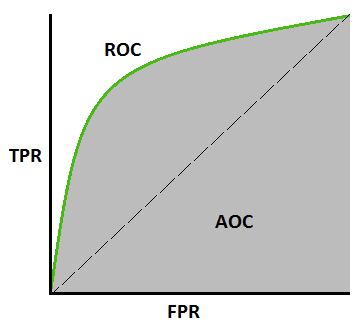

The best model is the one having a ROC curve that hugs the top left corner, that is, having a very high true positive rate and a very lor false positive rate. The diagonal represents a random guess model that (in the case of two classes) output positive with 50% probability.

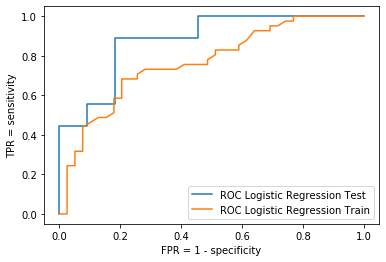

In [26]:
from sklearn.metrics import roc_curve

def plot_roc(predict_fn, X, y, label=None):
    fprs, tprs, t = roc_curve(y, predict_fn(X)[:,-1])
    
    # Plot the ROC
    plt.plot(fprs, tprs, label="ROC "+label)
    plt.xlabel("FPR = 1 - specificity")
    plt.ylabel("TPR = sensitivity")
    plt.legend()
    
plot_roc(lr_model.predict_proba, X_ns_test, y_ns_test, "Logistic Regression Test")
plot_roc(lr_model.predict_proba, X_ns_train, y_ns_train, "Logistic Regression Train")

Some classifiers don't have a straight forward way of computing a probability, and therefore a way to apply a varying threshold to control sesitivity:
- **KNN**: Given the query, we compute the K nearest neighbors and return as predicted class the most popular one among the neighbors label. We can predict a probability by returning the frequency of each class among the neighbors. $P(Y=c|x_q) = \frac{x_q\text{'s neighbors with class c}}{K}$. This is the value returned by `predict_proba`
- **SVM**: A probability for SVM is usually obtained by training an additional Logistic Regresson to covnert values predicted by the (already trained) SVM into [0, 1] probability values. You can enable `predict_proba` by specifying `SVC(..., probability=True)`

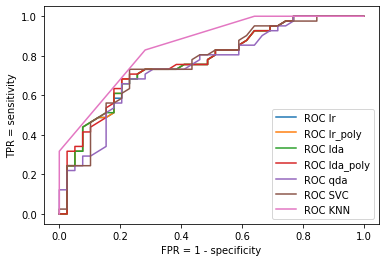

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

lr = LogisticRegression()
lr_poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('lda', LogisticRegression())])

lda = LDA()
lda_poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                     ('lda', LDA())])
qda = QDA()

svc = SVC(C=75, degree=2, kernel='poly',  probability=True)

knn = KNeighborsClassifier(n_neighbors=3)

for name, model in [('lr', lr), 
                    ('lr_poly', lr_poly), 
                    ('lda', lda),
                    ('lda_poly', lda_poly), 
                    ('qda', qda),
                    ('SVC', svc),
                    ('KNN', knn)]:
    model.fit(X_ns_train, y_ns_train)
    plot_roc(model.predict_proba, X_ns_train, y_ns_train, name)

# Algorithms comparison

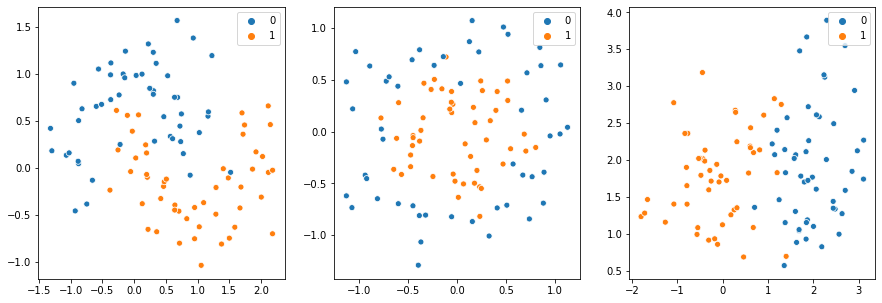

In [28]:
from sklearn.datasets import make_moons, make_circles, make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(15, 5))
for i, (X, y) in enumerate(datasets):
    ax = plt.subplot(1, 3, i+1)
    sns.scatterplot(X[:, 0], X[:, 1], hue=y, ax=ax)

In [29]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from matplotlib.colors import ListedColormap

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import make_moons, make_circles, make_classification

classifiers = [
    ("KNN", KNeighborsClassifier(), {"n_neighbors": range(1, 4)}),
    ("Perceptron", Perceptron(), None),
    ("LogisticRegression", LogisticRegression(fit_intercept=True), None),
    ("LinearSVM", SVC(kernel='linear'), {"C": np.linspace(0.0001, 100, 10)}),
    ("RBFSVM", SVC(kernel='rbf'), {'C': np.linspace(0.001, 100, 5),
                                   'gamma': np.linspace(0.001, 100, 5),
                                   'coef0': np.linspace(-10, 10, 5)}),
    ("PolySVM", SVC(kernel='poly'), {"C": np.linspace(0.0001, 100, 10), 
                                     "degree": range(2, 4),
                                     "coef0": np.linspace(-10, 10, 5)}),
    ("SigmoidSVM", SVC(kernel='sigmoid'), {'C': np.linspace(0.001, 100, 5),
                                           'gamma': np.linspace(0.001, 100, 5),
                                           'coef0': np.linspace(-10, 10, 5)}),
    ("LDA", LinearDiscriminantAnalysis(), None),
    ("PolyLDA", Pipeline([('poly', PolynomialFeatures()), 
                          ('lda', LinearDiscriminantAnalysis())]), {"poly__degree": range(2, 4)}),
    ("QDA", QuadraticDiscriminantAnalysis(), None)
]

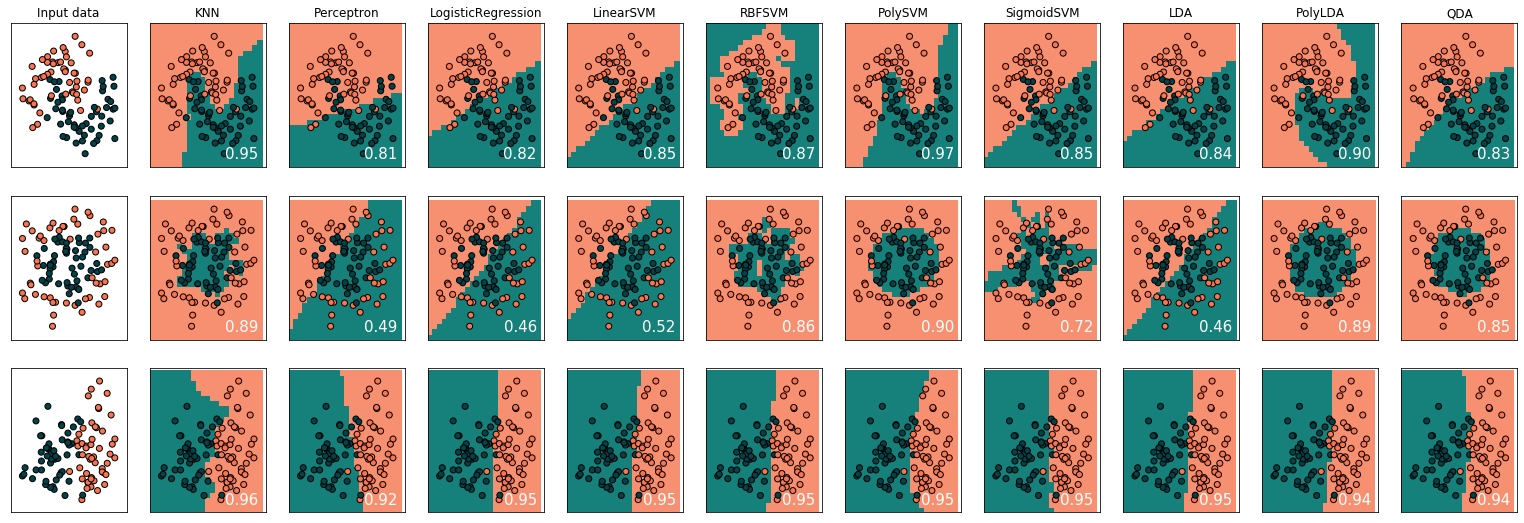

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, (X, y) in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))
    X_grid= np.stack([xx.reshape(-1), yy.reshape(-1)], axis=-1)

    # just plot the dataset first
    cm = ListedColormap(['#f79071', '#16817a'])
    cm_bright = ListedColormap(['#fa744f', '#024249'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, model, grid_params in classifiers:
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if grid_params is not None:
            grid = GridSearchCV(model, grid_params, cv=5, iid=False,
                                scoring='accuracy', refit=True, n_jobs=10)
            grid.fit(X, y)
            model = grid.best_estimator_
            score = grid.best_score_
        else:
            model = model.fit(X, y)
            score = np.mean(cross_val_score(model, X, y, scoring="accuracy", cv=5))

        # Use this if-the-else to show predicted 
        # probability distribution
        if hasattr(model, "decision_function"):
            Z = model.decision_function(X_grid)
        else:
            Z = model.predict_proba(X_grid)[:, 1]
        # Un-comment this to show the decision regions
        Z = model.predict(X_grid)        

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cm)
        # ax.contourf(xx, yy, Z, alpha=.8, cmap=cm)

        # Plot the training points
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')

        # Fix the plot size
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        # Remove ruler over the axis
        ax.set_xticks(())
        ax.set_yticks(())
        # Print the algorithm name if in the first row
        if ds_cnt == 0:
            ax.set_title(name)
        # Print the test accuracy
        ax.text(x_max - .3, y_min + .3, # coordinate where to write
                ('%.2f' % score), # what to write
                size=15, horizontalalignment='right', color="white")
        i += 1